# RK2

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

g = 9.81

def system_dynamics(t, y, m, r, alpha, beta, J):
    angle, angular_velocity = y
    torque = -m * g * r * np.cos(alpha + angle) - beta * angular_velocity
    return np.array([angular_velocity, torque / J])

def rk2_step(t, h, y, m, r, alpha, beta, J):
    k1 = h * system_dynamics(t, y, m, r, alpha, beta, J)
    k2 = h * system_dynamics(t + h/2, y + k1/2, m, r, alpha, beta, J)
    return y + k2

def rk2_solver(a, b, n, y0, m, r, alpha, beta, J):
    h = (b - a) / max(n, 1)
    t = np.linspace(a, b, n + 1)
    y = np.empty((n + 1, 2))
    y[0] = y0
    step = lambda i: rk2_step(t[i], h, y[i], m, r, alpha, beta, J)
    for i in range(n):
        y[i + 1] = step(i)
    return t, y[:, 0], y[:, 1]

def plot_solution(m, r, alpha_deg, beta, J, y0_angle_deg, y0_velocity):
    a, b, n = 0.0, 10.0, 500
    alpha = np.radians(alpha_deg)
    y0 = np.array([np.radians(y0_angle_deg), y0_velocity])
    t, y, dy = rk2_solver(a, b, n, y0, m, r, alpha, beta, J)

    fig, axs = plt.subplots(1, 3, figsize=(18, 4))
    axs[0].plot(t, y, color='blue')
    axs[0].set_xlabel('t')
    axs[0].set_ylabel('y(t)')
    axs[0].set_title('Angle vs Time')

    axs[1].plot(t, dy, color='green')
    axs[1].set_xlabel('t')
    axs[1].set_ylabel('y\'(t)')
    axs[1].set_title('Angular Velocity vs Time')

    axs[2].plot(y, dy, color='red')
    axs[2].set_xlabel('y(t)')
    axs[2].set_ylabel('y\'(t)')
    axs[2].set_title('Phase Space: y\'(t) vs y(t)')

    plt.tight_layout()
    plt.show()

m_slider = widgets.FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Mass m')
r_slider = widgets.FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Radius r')
alpha_slider = widgets.FloatSlider(value=0.0, min=-180.0, max=180.0, step=1.0, description='Alpha (deg)')
beta_slider = widgets.FloatSlider(value=0.1, min=0.0, max=5.0, step=0.1, description='Damping beta')
J_slider = widgets.FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Inertia J')
y0_angle_slider = widgets.FloatSlider(value=0.0, min=0.0, max=180.0, step=1.0, description='y0 Angle (deg)')
y0_velocity_slider = widgets.FloatSlider(value=0.0, min=-10.0, max=10.0, step=0.1, description='y0 Velocity')

ui = widgets.VBox([
    m_slider, r_slider, alpha_slider, beta_slider, J_slider,
    y0_angle_slider, y0_velocity_slider
])

out = widgets.interactive_output(
    plot_solution,
    {
        'm': m_slider,
        'r': r_slider,
        'alpha_deg': alpha_slider,
        'beta': beta_slider,
        'J': J_slider,
        'y0_angle_deg': y0_angle_slider,
        'y0_velocity': y0_velocity_slider
    }
)

display(ui, out)

Output()

# RK4

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

g = 9.81

def system_dynamics(t, y, m, r, alpha, beta, J):
    angle, angular_velocity = y
    torque = -m * g * r * np.cos(alpha + angle) - beta * angular_velocity
    return np.array([angular_velocity, torque / J])

def rk4_step(t, h, y, m, r, alpha, beta, J):
    k1 = h * system_dynamics(t, y, m, r, alpha, beta, J)
    k2 = h * system_dynamics(t + h/2, y + k1/2, m, r, alpha, beta, J)
    k3 = h * system_dynamics(t + h/2, y + k2/2, m, r, alpha, beta, J)
    k4 = h * system_dynamics(t + h, y + k3, m, r, alpha, beta, J)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

def rk4_solver(a, b, n, y0, m, r, alpha, beta, J):
    h = (b - a) / max(n, 1)
    t = np.linspace(a, b, n + 1)
    y = np.empty((n + 1, 2))
    y[0] = y0
    step = lambda i: rk4_step(t[i], h, y[i], m, r, alpha, beta, J)
    for i in range(n):
        y[i + 1] = step(i)
    return t, y[:, 0], y[:, 1]

def plot_solution(m, r, alpha_deg, beta, J, y0_angle_deg, y0_velocity):
    a, b, n = 0.0, 10.0, 500
    alpha = np.radians(alpha_deg)
    y0 = np.array([np.radians(y0_angle_deg), y0_velocity])
    t, y, dy = rk4_solver(a, b, n, y0, m, r, alpha, beta, J)

    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    axs[0].plot(t, y, color='blue')
    axs[0].set_title('Angle θ(t)')
    axs[0].set_xlabel('Time [s]')
    axs[0].set_ylabel('Angle [rad]')

    axs[1].plot(t, dy, color='green')
    axs[1].set_title('Angular Velocity θ\'(t)')
    axs[1].set_xlabel('Time [s]')
    axs[1].set_ylabel('Angular Velocity [rad/s]')

    axs[2].plot(y, dy, color='red')
    axs[2].set_title('Phase Space (θ vs θ\')')
    axs[2].set_xlabel('Angle [rad]')
    axs[2].set_ylabel('Angular Velocity [rad/s]')

    plt.tight_layout()
    plt.show()

m_slider = widgets.FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Mass m')
r_slider = widgets.FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='r')
alpha_slider = widgets.FloatSlider(value=0.0, min=-180, max=180, step=1, description='Alpha (°)')
beta_slider = widgets.FloatSlider(value=0.5, min=0.0, max=5.0, step=0.1, description='Damping β')
J_slider = widgets.FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Inertia J')

y0_angle_slider = widgets.FloatSlider(value=10.0, min=0.0, max=180, step=1, description='Initial θ (°)')
y0_velocity_slider = widgets.FloatSlider(value=0.0, min=-10.0, max=10.0, step=0.1, description='Initial θ\' (rad/s)')

ui = widgets.VBox([
    m_slider, r_slider, alpha_slider, beta_slider, J_slider,
    y0_angle_slider, y0_velocity_slider
])

out = widgets.interactive_output(
    plot_solution,
    {
        'm': m_slider,
        'r': r_slider,
        'alpha_deg': alpha_slider,
        'beta': beta_slider,
        'J': J_slider,
        'y0_angle_deg': y0_angle_slider,
        'y0_velocity': y0_velocity_slider
    }
)

display(ui, out)

Output()

# RK45

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from scipy.integrate import solve_ivp

g = 9.81

def system_dynamics(t, y, m, r, alpha, beta, J):
    angle, angular_velocity = y
    torque = -m * g * r * np.cos(alpha + angle) - beta * angular_velocity
    return [angular_velocity, torque / J]

def rk45_solver(a, b, y0, m, r, alpha, beta, J):
    fun = lambda t, y: system_dynamics(t, y, m, r, alpha, beta, J)
    sol = solve_ivp(fun, (a, b), y0, method='RK45', t_eval=np.linspace(a, b, 500))
    return sol.t, sol.y[0], sol.y[1]

def plot_solution(m, r, alpha_deg, beta, J, y0_angle_deg, y0_velocity):
    a, b = 0.0, 10.0
    alpha = np.radians(alpha_deg)
    y0 = [np.radians(y0_angle_deg), y0_velocity]

    t, y, dy = rk45_solver(a, b, y0, m, r, alpha, beta, J)

    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    axs[0].plot(t, y, color='blue')
    axs[0].set_title('Angle vs Time')
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Angle (rad)')

    axs[1].plot(t, dy, color='green')
    axs[1].set_title('Angular Velocity vs Time')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Angular Velocity (rad/s)')

    axs[2].plot(y, dy, color='red')
    axs[2].set_title('Phase Space (Angle vs Angular Velocity)')
    axs[2].set_xlabel('Angle (rad)')
    axs[2].set_ylabel('Angular Velocity (rad/s)')

    plt.tight_layout()
    plt.show()

m_widget = widgets.FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Mass (kg)')
r_widget = widgets.FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Radius (m)')
alpha_widget = widgets.FloatSlider(value=0.0, min=-180.0, max=180.0, step=1.0, description='Alpha (deg)')
beta_widget = widgets.FloatSlider(value=0.1, min=0.0, max=5.0, step=0.1, description='Damping (kg m²/s)')
J_widget = widgets.FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Inertia (kg m²)')

y0_angle_widget = widgets.FloatSlider(value=10.0, min=0.0, max=180.0, step=1.0, description='y₀ (deg)')
y0_velocity_widget = widgets.FloatSlider(value=0.0, min=-10.0, max=10.0, step=0.1, description="y'₀ (rad/s)")

ui = widgets.VBox([
    m_widget,
    r_widget,
    alpha_widget,
    beta_widget,
    J_widget,
    y0_angle_widget,
    y0_velocity_widget
])

out = widgets.interactive_output(
    plot_solution,
    {
        'm': m_widget,
        'r': r_widget,
        'alpha_deg': alpha_widget,
        'beta': beta_widget,
        'J': J_widget,
        'y0_angle_deg': y0_angle_widget,
        'y0_velocity': y0_velocity_widget
    }
)

display(ui, out)

Output()

# Spectrum

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from scipy.integrate import solve_ivp
from scipy.fft import fft, fftfreq

g = 9.81

def system_dynamics(t, y, m, r, alpha, beta, J):
    angle, angular_velocity = y
    torque = -m * g * r * angle ** 5 - beta * angular_velocity
    return angular_velocity, torque / J

def solve_motion(a, b, y0, m, r, alpha, beta, J):
    dynamics = lambda t, y: system_dynamics(t, y, m, r, alpha, beta, J)
    t_span = np.linspace(a, b, 500)
    sol = solve_ivp(dynamics, (a, b), y0, method='RK45', t_eval=t_span)
    return sol.t, sol.y[0], sol.y[1]

def compute_spectrum(signal, sampling_rate):
    n = signal.size
    frequencies = fftfreq(n, d=1/sampling_rate)
    spectrum = np.abs(fft(signal)) / n
    return frequencies[:n // 2], spectrum[:n // 2]

def plot_all(m, r, alpha_deg, beta, J, y0_angle_deg, y0_velocity):
    a, b = 0.0, 10.0
    alpha = np.radians(alpha_deg)
    y0 = (np.radians(y0_angle_deg), y0_velocity)
    t, y, dy = solve_motion(a, b, y0, m, r, alpha, beta, J)
    sampling_rate = t.size / (b - a)
    frequencies, spectrum = compute_spectrum(y, sampling_rate)
    mask = frequencies > 0.10
    peak_freq = frequencies[mask][np.argmax(spectrum[mask])]
    peak_amp = spectrum[mask][np.argmax(spectrum[mask])]

    fig, axs = plt.subplots(2, 2, figsize=(14, 10))

    axs[0, 0].plot(t, y, color='blue')
    axs[0, 0].set_title('Angle vs Time')
    axs[0, 0].set_xlabel('Time (s)')
    axs[0, 0].set_ylabel('Angle (rad)')

    axs[0, 1].plot(t, dy, color='green')
    axs[0, 1].set_title('Angular Velocity vs Time')
    axs[0, 1].set_xlabel('Time (s)')
    axs[0, 1].set_ylabel('Angular Velocity (rad/s)')

    axs[1, 0].plot(y, dy, color='red')
    axs[1, 0].set_title('Phase Space (Angle vs Angular Velocity)')
    axs[1, 0].set_xlabel('Angle (rad)')
    axs[1, 0].set_ylabel('Angular Velocity (rad/s)')

    axs[1, 1].plot(frequencies, spectrum, color='purple')
    axs[1, 1].set_title('Fourier Spectrum of Angle')
    axs[1, 1].set_xlabel('Frequency (Hz)')
    axs[1, 1].set_ylabel('Amplitude')
    axs[1, 1].set_xlim(0, 10)
    axs[1, 1].annotate(f'Peak ≈ {peak_freq:.2f} Hz',
                   xy=(peak_freq, peak_amp),
                   xytext=(peak_freq + 1, peak_amp * 0.5),
                   arrowprops=dict(arrowstyle='->', color='black'))

    fig.tight_layout()
    plt.show()

def create_widgets():
    m = widgets.FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Mass (kg)')
    r = widgets.FloatSlider(value=0.5, min=0.1, max=5.0, step=0.1, description='Radius (m)')
    alpha_deg = widgets.FloatSlider(value=0.0, min=-180, max=180, step=1, description='Alpha (deg)')
    beta = widgets.FloatSlider(value=0.1, min=0.0, max=5.0, step=0.1, description='Damping')
    J = widgets.FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Inertia')
    y0_angle_deg = widgets.FloatSlider(value=10.0, min=-180, max=180, step=1, description='Initial Angle (deg)')
    y0_velocity = widgets.FloatSlider(value=0.0, min=-10.0, max=10.0, step=0.1, description='Initial Velocity')

    ui = widgets.VBox([m, r, alpha_deg, beta, J, y0_angle_deg, y0_velocity])
    out = widgets.interactive_output(
        plot_all,
        {'m': m, 'r': r, 'alpha_deg': alpha_deg, 'beta': beta, 'J': J, 'y0_angle_deg': y0_angle_deg, 'y0_velocity': y0_velocity}
    )
    display(ui, out)

create_widgets()

Output()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from scipy.integrate import solve_ivp
from scipy.fft import fft, fftfreq

g = 9.81

def system_dynamics(t, y, m, r, alpha, beta, J):
    angle, angular_velocity = y
    torque = -m * g * r * np.cos(alpha + angle) - beta * angular_velocity
    return angular_velocity, torque / J

def solve_motion(a, b, y0, m, r, alpha, beta, J):
    dynamics = lambda t, y: system_dynamics(t, y, m, r, alpha, beta, J)
    t_span = np.linspace(a, b, 500)
    sol = solve_ivp(dynamics, (a, b), y0, method='RK45', t_eval=t_span)
    return sol.t, sol.y[0], sol.y[1]

def compute_spectrum(signal, sampling_rate):
    n = signal.size
    frequencies = fftfreq(n, d=1/sampling_rate)
    spectrum = np.abs(fft(signal)) / n
    return frequencies[:n // 2], spectrum[:n // 2]

def plot_all(m, r, alpha_deg, beta, J, y0_angle_deg, y0_velocity):
    a, b = 0.0, 10.0
    alpha = np.radians(alpha_deg)
    y0 = (np.radians(y0_angle_deg), y0_velocity)
    t, y, dy = solve_motion(a, b, y0, m, r, alpha, beta, J)
    sampling_rate = t.size / (b - a)
    frequencies, spectrum = compute_spectrum(y, sampling_rate)
    mask = frequencies > 0.10
    peak_freq = frequencies[mask][np.argmax(spectrum[mask])]
    peak_amp = spectrum[mask][np.argmax(spectrum[mask])]

    fig, axs = plt.subplots(2, 2, figsize=(14, 10))

    axs[0, 0].plot(t, y, color='blue')
    axs[0, 0].set_title('Angle vs Time')
    axs[0, 0].set_xlabel('Time (s)')
    axs[0, 0].set_ylabel('Angle (rad)')

    axs[0, 1].plot(t, dy, color='green')
    axs[0, 1].set_title('Angular Velocity vs Time')
    axs[0, 1].set_xlabel('Time (s)')
    axs[0, 1].set_ylabel('Angular Velocity (rad/s)')

    axs[1, 0].plot(y, dy, color='red')
    axs[1, 0].set_title('Phase Space (Angle vs Angular Velocity)')
    axs[1, 0].set_xlabel('Angle (rad)')
    axs[1, 0].set_ylabel('Angular Velocity (rad/s)')

    axs[1, 1].plot(frequencies, spectrum, color='purple')
    axs[1, 1].set_title('Fourier Spectrum of Angle')
    axs[1, 1].set_xlabel('Frequency (Hz)')
    axs[1, 1].set_ylabel('Amplitude')
    axs[1, 1].set_xlim(0, 10)
    axs[1, 1].annotate(f'Peak ≈ {peak_freq:.2f} Hz',
                   xy=(peak_freq, peak_amp),
                   xytext=(peak_freq + 1, peak_amp * 0.5),
                   arrowprops=dict(arrowstyle='->', color='black'))

    fig.tight_layout()
    plt.show()

def create_widgets():
    m = widgets.FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Mass (kg)')
    r = widgets.FloatSlider(value=0.5, min=0.1, max=5.0, step=0.1, description='Radius (m)')
    alpha_deg = widgets.FloatSlider(value=0.0, min=-180, max=180, step=1, description='Alpha (deg)')
    beta = widgets.FloatSlider(value=0.1, min=0.0, max=5.0, step=0.1, description='Damping')
    J = widgets.FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Inertia')
    y0_angle_deg = widgets.FloatSlider(value=10.0, min=-180, max=180, step=1, description='Initial Angle (deg)')
    y0_velocity = widgets.FloatSlider(value=0.0, min=-10.0, max=10.0, step=0.1, description='Initial Velocity')

    ui = widgets.VBox([m, r, alpha_deg, beta, J, y0_angle_deg, y0_velocity])
    out = widgets.interactive_output(
        plot_all,
        {'m': m, 'r': r, 'alpha_deg': alpha_deg, 'beta': beta, 'J': J, 'y0_angle_deg': y0_angle_deg, 'y0_velocity': y0_velocity}
    )
    display(ui, out)

create_widgets()

Output()

# Real Data

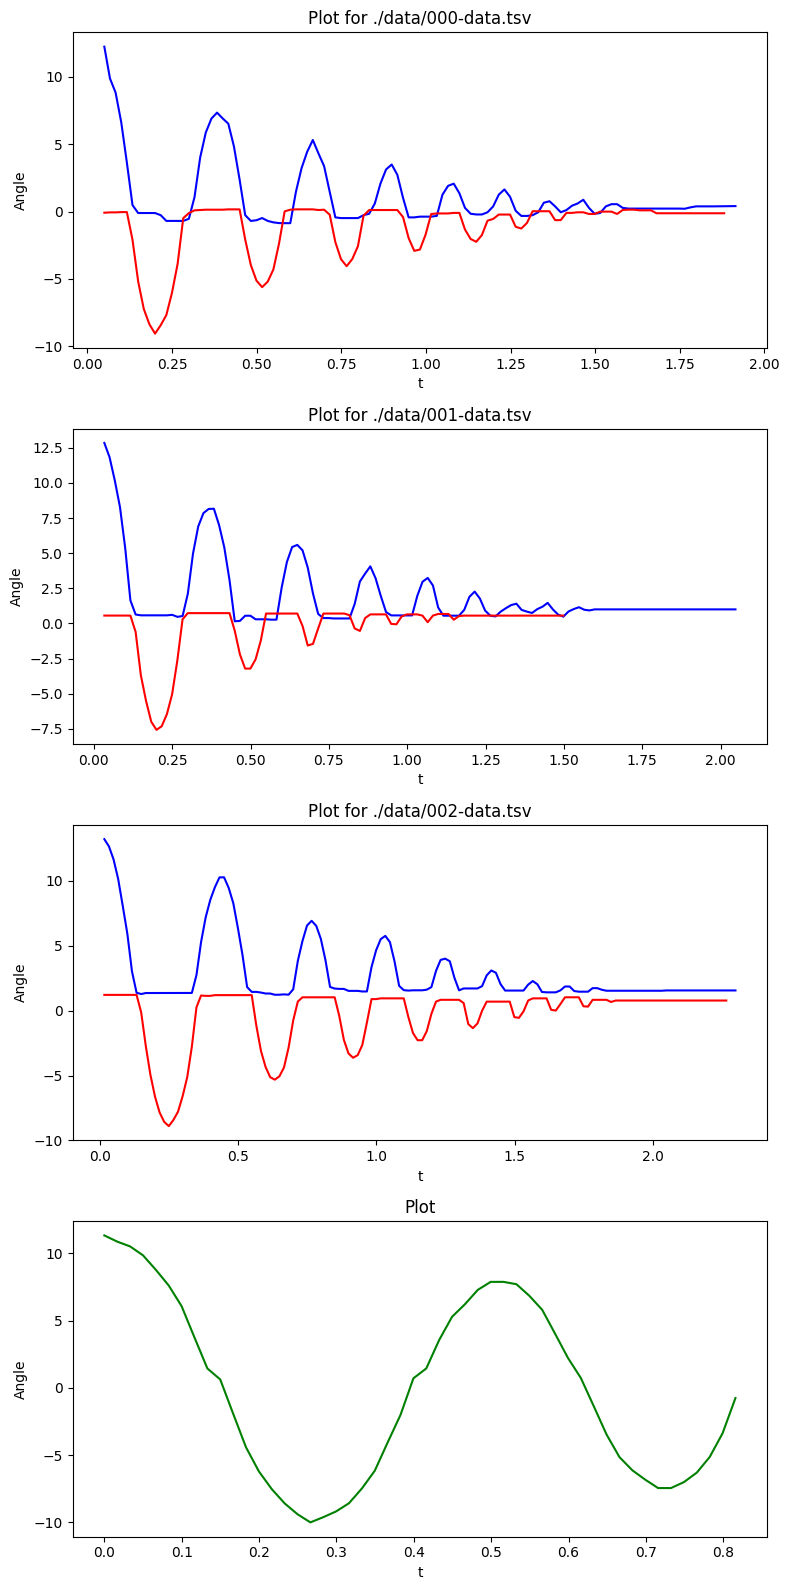

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

files = ['./data/000-data.tsv', './data/001-data.tsv', './data/002-data.tsv']

fig, axes = plt.subplots(4, 1, figsize=(8, 16))

for i, file in enumerate(files):
    data = pd.read_csv(file, sep='\t', header=None)

    x1, y1 = data[0], data[1]
    x2, y2 = data[2], data[3]

    axes[i].plot(x1, y1, linestyle='-', color='b')

    axes[i].plot(x2, y2, linestyle='-', color='r')

    axes[i].set_title(f'Plot for {file}')
    axes[i].set_xlabel('t')
    axes[i].set_ylabel('Angle')

data = pd.read_csv('./data/003-data.tsv', sep='\t', header=None)
x, y = data[0], data[1]
axes[3].plot(x, y, linestyle='-', color='g')
axes[3].set_title('Plot')
axes[3].set_xlabel('t')
axes[3].set_ylabel('Angle')

plt.tight_layout()

plt.show()

./data/000-data.tsv y1 peak freq > 0.05: 0.0619
./data/000-data.tsv y2 peak freq > 0.05: 0.0265
./data/001-data.tsv y1 peak freq > 0.05: 0.0574
./data/001-data.tsv y2 peak freq > 0.05: 0.0246
./data/002-data.tsv y1 peak freq > 0.05: 0.0507
./data/002-data.tsv y2 peak freq > 0.05: 0.0217
./data/003-data.tsv peak freq > 0.05: 0.0400


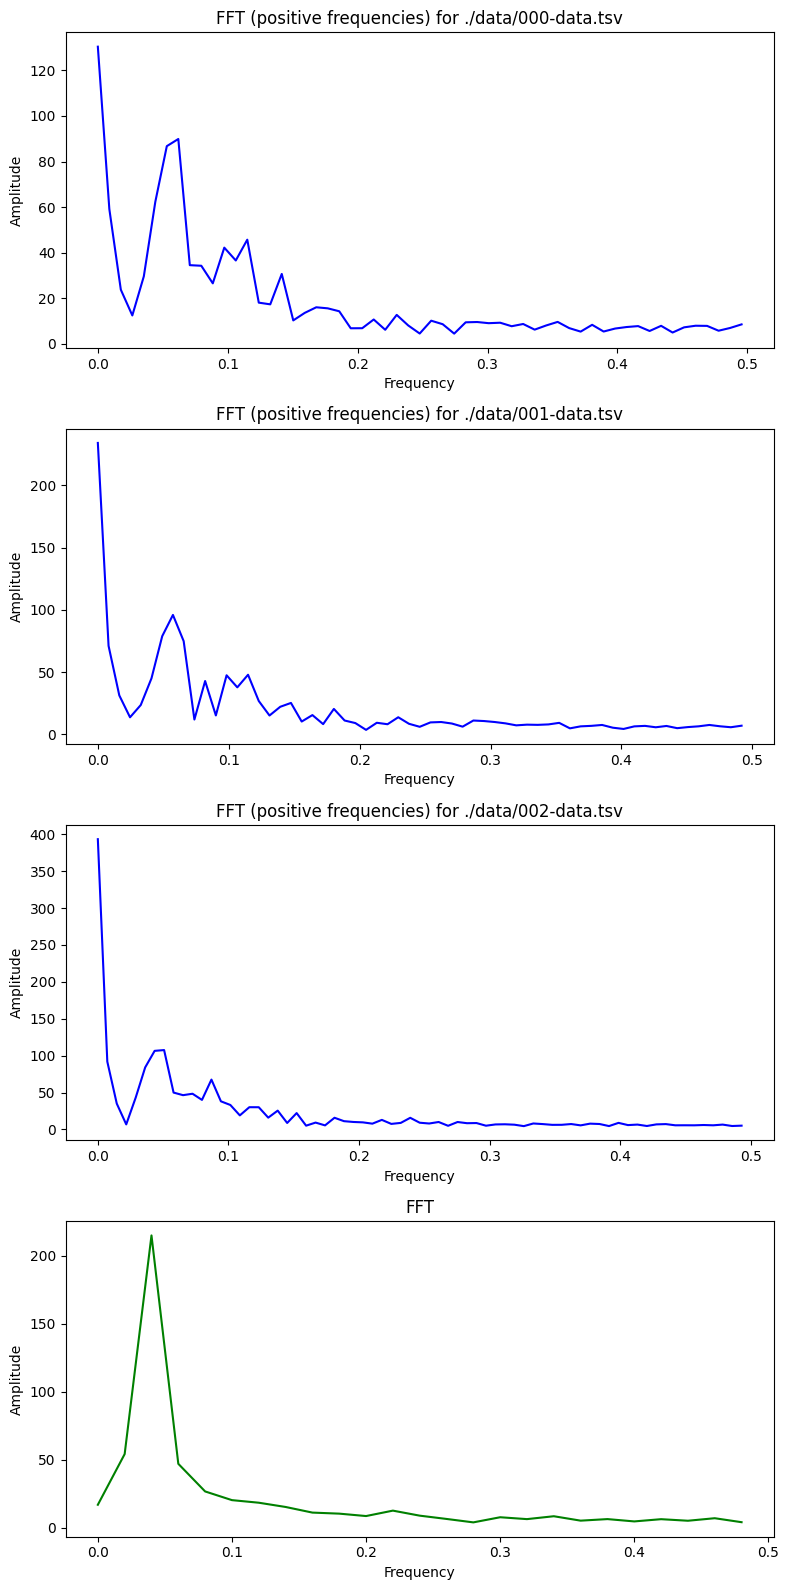

In [16]:
import numpy as np

fig2, axes2 = plt.subplots(4, 1, figsize=(8, 16))

def plot_fft(ax, signal, label, color):
    N = len(signal)
    freq = np.fft.fftfreq(N)
    fft_val = np.fft.fft(signal)
    mask = (freq >= 0.02) & (freq >= 0)
    peak_freq = freq[mask][np.argmax(np.abs(fft_val)[mask])]
    print(f'{label} peak freq > 0.05: {peak_freq:.4f}')
    ax.plot(freq[freq >= 0], np.abs(fft_val)[freq >= 0], linestyle='-', color=color)

for i, file in enumerate(files):
    data = pd.read_csv(file, sep='\t', header=None)
    y1 = data.iloc[:, 1]
    y2 = data.iloc[:, 3]
    plot_fft(axes2[i], y1, f'{file} y1', 'b')
    plot_fft(axes2[i], y2, f'{file} y2', 'r')
    axes2[i].set_title(f'FFT (positive frequencies) for {file}')
    axes2[i].set_xlabel('Frequency')
    axes2[i].set_ylabel('Amplitude')

plot_fft(axes2[3], y, './data/003-data.tsv', 'g')
axes2[3].set_title('FFT')
axes2[3].set_xlabel('Frequency')
axes2[3].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Comparison

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from scipy.integrate import solve_ivp
from scipy.fft import fft, fftfreq

g = 9.81

def system_dynamics(t, y, m, r, alpha, beta, J):
    angle, angular_velocity = y
    torque = -m * g * r * np.cos(alpha + angle) - beta * angular_velocity
    return angular_velocity, torque / J

def solve_motion(a, b, y0, m, r, alpha, beta, J):
    t_span = np.linspace(a, b, 500)
    sol = solve_ivp(
        system_dynamics,
        (a, b),
        y0,
        t_eval=t_span,
        method='RK45',
        args=(m, r, alpha, beta, J)
    )
    return sol.t, sol.y[0], sol.y[1]

def compute_spectrum(signal, sampling_rate):
    n = signal.size
    frequencies = fftfreq(n, d=1 / sampling_rate)
    spectrum = np.abs(fft(signal)) / n
    return frequencies[:n // 2], spectrum[:n // 2]

df = pd.read_csv('./data/003-data.tsv', sep='\t', header=None, names=['time', 'angle'])
df['angle'] = np.radians(df['angle'])

def plot_with_experiment(m, r, alpha_deg, beta, J):
    a, b = float(df['time'].iloc[0]), float(df['time'].iloc[-1])
    alpha = np.radians(alpha_deg)
    initial_angle = df['angle'].iloc[0]
    initial_velocity = 0.0
    y0 = (initial_angle, initial_velocity)

    t_sim, y_sim, _ = solve_motion(a, b, y0, m, r, alpha, beta, J)
    angle_exp = np.interp(t_sim, df['time'], df['angle'])

    fig, axs = plt.subplots(2, 1, figsize=(12, 8))

    axs[0].plot(df['time'], df['angle'], label='Experimental', color='black')
    axs[0].plot(t_sim, y_sim, label='Simulated (RK45)', color='blue', linestyle='--')
    axs[0].set_title('Angle Comparison')
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Angle (rad)')
    axs[0].legend()
    axs[0].grid(True)

    axs[1].plot(t_sim, y_sim - angle_exp, color='red')
    axs[1].set_title('Error (Simulated - Experimental)')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Angle Error (rad)')
    axs[1].grid(True)

    fig.tight_layout()
    plt.show()

def create_widgets_with_data():
    m = widgets.FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Mass (kg)')
    r = widgets.FloatSlider(value=0.5, min=0.1, max=5.0, step=0.1, description='Radius (m)')
    alpha_deg = widgets.FloatSlider(value=0.0, min=-180, max=180, step=1, description='Alpha (deg)')
    beta = widgets.FloatSlider(value=0.1, min=0.0, max=5.0, step=0.1, description='Damping')
    J = widgets.FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Inertia')

    ui = widgets.VBox([m, r, alpha_deg, beta, J])
    out = widgets.interactive_output(
        plot_with_experiment,
        {'m': m, 'r': r, 'alpha_deg': alpha_deg, 'beta': beta, 'J': J}
    )
    display(ui, out)

create_widgets_with_data()

Output()

Optimal parameters: Mass = 0.68 , Radius = 0.68 , Alpha = -89.65 deg, Damping = 4.93, Inertia = 2.92


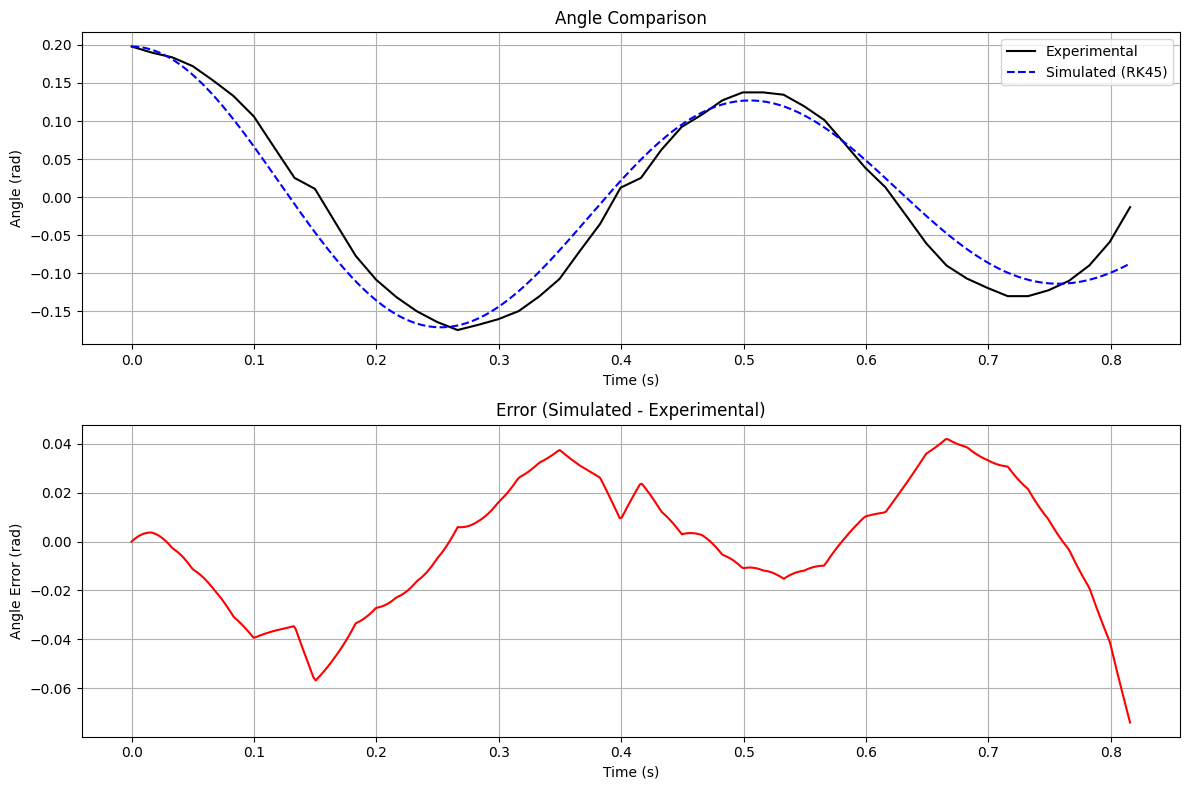

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy import optimize

g = 981

def system_dynamics(t, y, m, r, alpha, beta, J):
    angle, angular_velocity = y
    torque = -m * g * r * np.cos(alpha + angle) - beta * angular_velocity
    return angular_velocity, torque / J

def solve_motion(a, b, y0, m, r, alpha, beta, J):
    t_span = np.linspace(a, b, 500)
    sol = solve_ivp(
        system_dynamics,
        (a, b),
        y0,
        t_eval=t_span,
        method='RK45',
        args=(m, r, alpha, beta, J)
    )
    return sol.t, sol.y[0], sol.y[1]

df = pd.read_csv('./data/003-data.tsv', sep='\t', header=None, names=['time', 'angle'])
df['angle'] = np.radians(df['angle'])

def cost_function(params):
    m, r, alpha_deg, beta, J = params
    a, b = float(df['time'].iloc[0]), float(df['time'].iloc[-1])
    alpha = np.radians(alpha_deg)
    initial_angle = df['angle'].iloc[0]
    initial_velocity = 0.0
    y0 = (initial_angle, initial_velocity)

    t_sim, y_sim, _ = solve_motion(a, b, y0, m, r, alpha, beta, J)
    angle_exp = np.interp(t_sim, df['time'], df['angle'])

    error = y_sim - angle_exp
    return np.sum(error**2)

def fit_parameters():
    initial_guess = [1.0, 0.5, 0.0, 0.1, 1.0]

    bounds = [(0.1, 10.0),  # mass
              (0.1, 5.0),   # radius
              (-180, 180),  # alpha (degrees)
              (0.0, 5.0),   # damping
              (0.1, 10.0)]  # inertia

    result = optimize.minimize(cost_function, initial_guess, bounds=bounds, method='L-BFGS-B')

    optimal_params = result.x
    return optimal_params

def plot_with_experiment(m, r, alpha_deg, beta, J):
    a, b = float(df['time'].iloc[0]), float(df['time'].iloc[-1])
    alpha = np.radians(alpha_deg)
    initial_angle = df['angle'].iloc[0]
    initial_velocity = 0.0
    y0 = (initial_angle, initial_velocity)

    t_sim, y_sim, _ = solve_motion(a, b, y0, m, r, alpha, beta, J)
    angle_exp = np.interp(t_sim, df['time'], df['angle'])

    fig, axs = plt.subplots(2, 1, figsize=(12, 8))

    axs[0].plot(df['time'], df['angle'], label='Experimental', color='black')
    axs[0].plot(t_sim, y_sim, label='Simulated (RK45)', color='blue', linestyle='--')
    axs[0].set_title('Angle Comparison')
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Angle (rad)')
    axs[0].legend()
    axs[0].grid(True)

    axs[1].plot(t_sim, y_sim - angle_exp, color='red')
    axs[1].set_title('Error (Simulated - Experimental)')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Angle Error (rad)')
    axs[1].grid(True)

    fig.tight_layout()
    plt.show()

optimal_params = fit_parameters()
print(f"Optimal parameters: Mass = {optimal_params[0]:.2f} , Radius = {optimal_params[1]:.2f} , "
      f"Alpha = {optimal_params[2]:.2f} deg, Damping = {optimal_params[3]:.2f}, Inertia = {optimal_params[4]:.2f}")

plot_with_experiment(*optimal_params)